In [2]:
! pip install yfinance 

     |████████████████████████████████| 6.3 MB 6.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import yfinance as yf
data_stock = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "AAPL",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [4]:
data_stock.info()
data_aapl = data_stock.loc[~data_stock.index.duplicated(keep='last')]
data_aapl.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10332 entries, 1980-12-12 to 2021-12-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10332 non-null  float64
 1   High    10332 non-null  float64
 2   Low     10332 non-null  float64
 3   Close   10332 non-null  float64
 4   Volume  10332 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 484.3 KB


In [5]:
print(data_aapl.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10332 entries, 1980-12-12 to 2021-12-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10332 non-null  float64
 1   High    10332 non-null  float64
 2   Low     10332 non-null  float64
 3   Close   10332 non-null  float64
 4   Volume  10332 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 484.3 KB
None


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data_aapl[column_name] = data_aapl['Close'].rolling(ma).mean()

In [8]:
data = data_aapl.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

9816

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.75278567e-04],
       [3.43567013e-04],
       [3.01280027e-04],
       ...,
       [1.00000000e+00],
       [9.96792970e-01],
       [9.90681387e-01]])

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00037528, 0.00034357, 0.00030128, 0.00031449, 0.00033035,
       0.00036471, 0.00039378, 0.00042021, 0.00045456, 0.00051799,
       0.00052856, 0.00051006, 0.00048892, 0.00049685, 0.00048099,
       0.00044928, 0.00042021, 0.000407  , 0.00044135, 0.00043606,
       0.00041228, 0.00041492, 0.00042814, 0.00042285, 0.00046249,
       0.00044135, 0.00045456, 0.00046249, 0.00045985, 0.00044928,
       0.00044399, 0.00042285, 0.00039907, 0.00036471, 0.00033035,
       0.0003515 , 0.00037264, 0.00037264, 0.00037528, 0.00034357,
       0.00034357, 0.00032507, 0.00031978, 0.00030657, 0.00031978,
       0.00034357, 0.00030921, 0.00028014, 0.00028807, 0.00026957,
       0.00030128, 0.00030921, 0.00032771, 0.00033035, 0.00032243,
       0.00031714, 0.00031449, 0.00030921, 0.00026693, 0.00024314])]
[0.00022463868844680126]

[array([0.00037528, 0.00034357, 0.00030128, 0.00031449, 0.00033035,
       0.00036471, 0.00039378, 0.00042021, 0.00045456, 0.00051799,
       0.00052856, 0.00051006, 0

In [11]:
#from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

9756/9756 [==============================] - 335s 34ms/step - loss: 9.1107e-05


In [12]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11.804410180099804

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


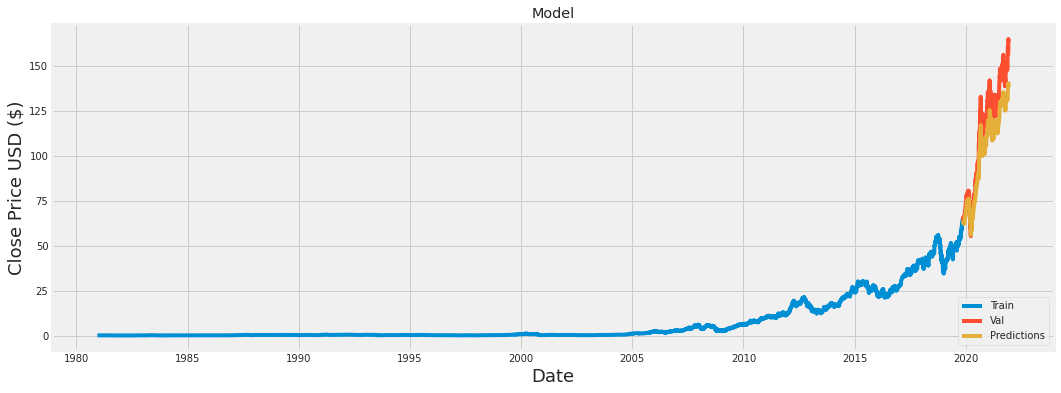

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
valid

,Close,Predictions
Date,,
2019-11-15,65.467537,62.464836
2019-11-18,65.797638,62.733017
2019-11-19,65.598106,63.056992
2019-11-20,64.834450,63.194569
2019-11-21,64.543762,62.968155
...,...,...
2021-11-26,156.809998,140.006470
2021-11-29,160.240005,138.575684
2021-11-30,165.300003,138.553131
